# 0.2 Load MNNIST

In [10]:
import numpy as np
import os
import gzip
import matplotlib.pyplot as plt

def read_idx(filename):
    """Read an IDX file and return it as a numpy array."""
    with gzip.open(filename, 'rb') if filename.endswith('.gz') else open(filename, 'rb') as f:
        zero, data_type, dims = int.from_bytes(f.read(2), 'big'), f.read(1), int.from_bytes(f.read(1), 'big')
        shape = tuple(int.from_bytes(f.read(4), 'big') for _ in range(dims))
        data = np.frombuffer(f.read(), dtype=np.uint8)
        if data_type == b'\x08':
            data = data.astype(np.uint8)
        elif data_type == b'\x09':
            data = data.astype(np.int8)
        return data.reshape(shape)

def binarize_images(images, threshold=128):
    """Binarize a set of images based on a threshold."""
    return np.where(images > threshold, 127, 0).astype(np.uint8)

def load_mnist_and_binarize(path):
    """Load and binarize the MNIST dataset from the specified path."""
    train_images_path = os.path.join(path, 'train-images-idx3-ubyte.gz')
    train_labels_path = os.path.join(path, 'train-labels-idx1-ubyte.gz')
    test_images_path = os.path.join(path, 't10k-images-idx3-ubyte.gz')
    test_labels_path = os.path.join(path, 't10k-labels-idx1-ubyte.gz')

    x_train = binarize_images(read_idx(train_images_path))
    y_train = read_idx(train_labels_path)
    x_test = binarize_images(read_idx(test_images_path))
    y_test = read_idx(test_labels_path)

    return x_train, y_train, x_test, y_test


x_train shape: (60000, 28, 28)y_train shape: (60000,)x_test shape: (10000, 28, 28)y_test shape: (10000,)


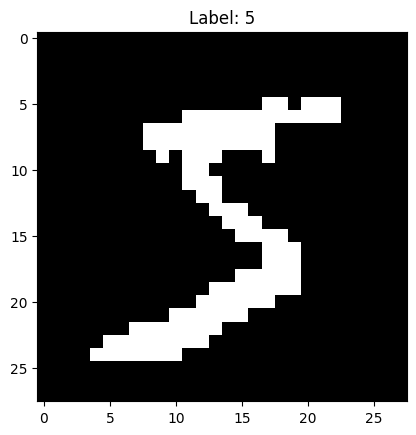

In [12]:
# Assuming you have already loaded the dataset using the load_mnist function
x_train, y_train, x_test, y_test = load_mnist_and_binarize('../data')

print(f'x_train shape: {x_train.shape}'
      f'y_train shape: {y_train.shape}'
      f'x_test shape: {x_test.shape}'
      f'y_test shape: {y_test.shape}')

# Now, let's plot the first image in the training set
image = x_train[0]  # This gets the first image in the dataset
label = y_train[0]  # This gets the corresponding label for the first image

# Plotting the image
plt.imshow(image, cmap='gray')  # cmap='gray' displays the image in grayscale
plt.title(f'Label: {label}')
plt.show()
